<a href="https://www.kaggle.com/code/kusumakar/disaster-eda?scriptVersionId=202446898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-disaster-management-in-2024/natural_disasters_2024.csv


In [2]:
df=pd.read_csv("/kaggle/input/prediction-of-disaster-management-in-2024/natural_disasters_2024.csv")

In [3]:
df.head()

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08


## Checking Data Quality

In [4]:
df.describe()

,Disaster_ID,Magnitude,Fatalities,Economic_Loss($)
count,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,5.559173,4984.928900,5.049752e+08
std,2886.89568,2.619304,2900.114029,2.861325e+08
min,1.00000,1.000656,0.000000,1.036597e+06
25%,2500.75000,3.263217,2481.750000,2.636352e+08
50%,5000.50000,5.589578,4947.000000,5.078407e+08
75%,7500.25000,7.829268,7511.250000,7.527256e+08
max,10000.00000,9.999671,9999.000000,9.998528e+08


In [5]:
df.isnull().sum()

Disaster_ID         0
Disaster_Type       0
Location            0
Magnitude           0
Date                0
Fatalities          0
Economic_Loss($)    0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Disaster_Type', ylabel='Fatalities'>

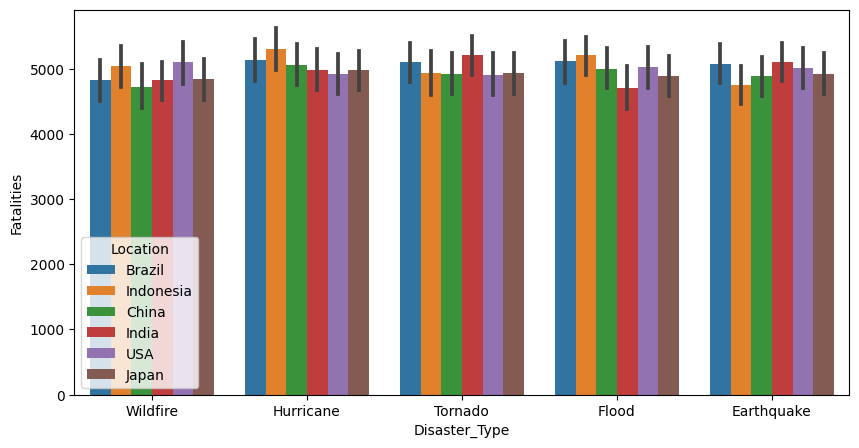

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Disaster_Type',y='Fatalities',hue='Location')

## Indonesia has the highest fatalities due to Flood and Hurricanes
## India has largest fatailities due to Tornadoes and Earthquakes
## USA has been highly impacted due to Wildfire

In [8]:
df['Month']=pd.to_datetime(df['Date']).dt.month


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'Magnitude of Flood across different months Per Country')

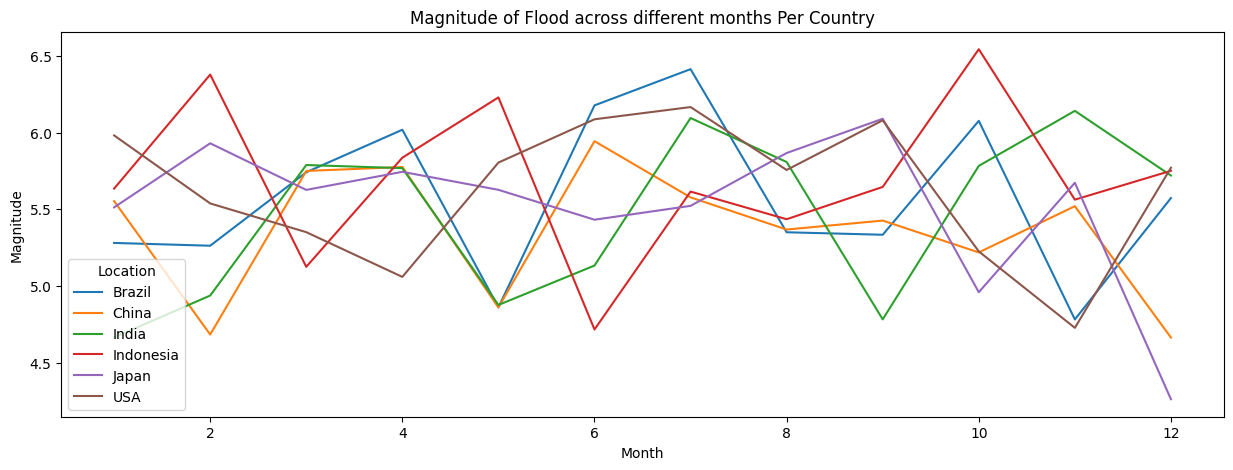

In [9]:
df2=df[df.Disaster_Type=='Flood'].groupby(["Location","Month"]).agg({"Magnitude":"mean"}).reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='Month',y='Magnitude',data=df2,hue='Location')
plt.title("Magnitude of Flood across different months Per Country")

### Brazil faces most floods during month of June to August
### Indonesia experiences most magnitude of floods during September & October
### India faces most floods during July and November

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'Magnitude of Hurricane across different months Per Country')

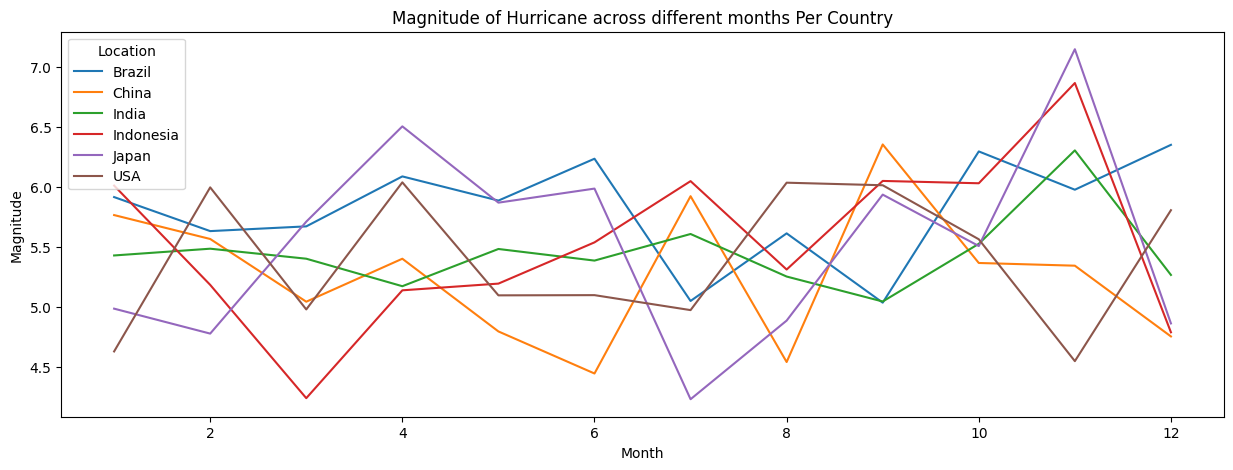

In [10]:
df2=df[df.Disaster_Type=='Hurricane'].groupby(["Location","Month"]).agg({"Magnitude":"mean"}).reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='Month',y='Magnitude',data=df2,hue='Location')
plt.title("Magnitude of Hurricane across different months Per Country")

### Indonesia and Japan face most hurricanes during November & December
### China experiences major magnitude during  September & OCtober

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'Magnitude of Earthquake across different months Per Country')

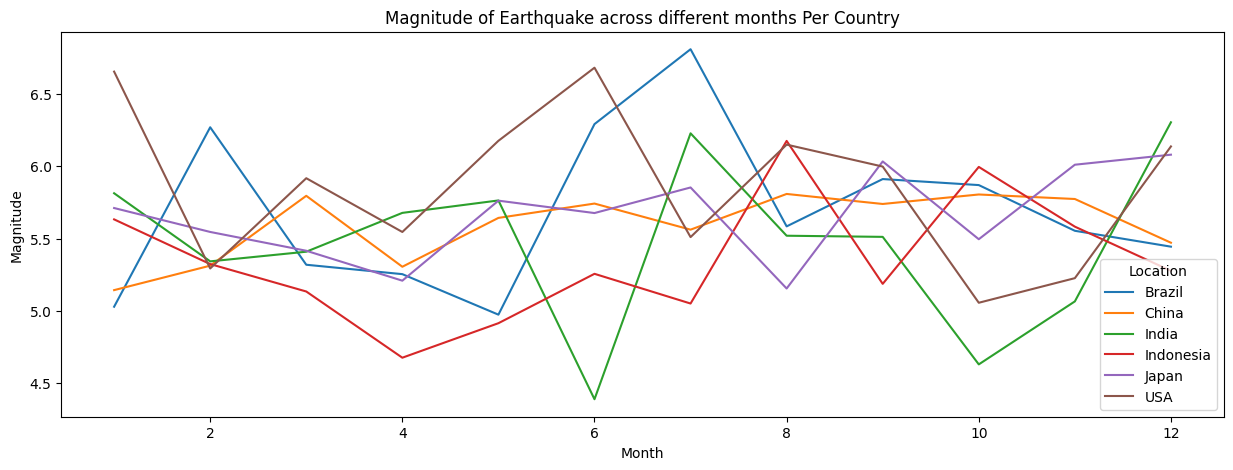

In [11]:
df2=df[df.Disaster_Type=='Earthquake'].groupby(["Location","Month"]).agg({"Magnitude":"mean"}).reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='Month',y='Magnitude',data=df2,hue='Location')
plt.title("Magnitude of Earthquake across different months Per Country")

### USA and Brazil face major earthquakes during June & July
### India faces major earthquakes during July
### China & Japan do not seem to have any major earthquake throughout the year

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'Magnitude of Tornado across different months Per Country')

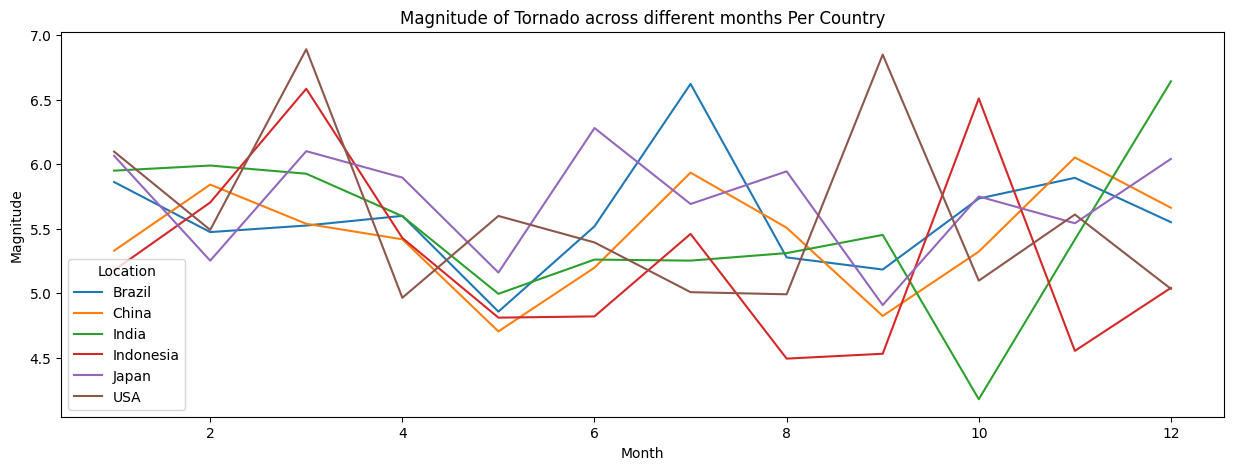

In [12]:
df2=df[df.Disaster_Type=='Tornado'].groupby(["Location","Month"]).agg({"Magnitude":"mean"}).reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='Month',y='Magnitude',data=df2,hue='Location')
plt.title("Magnitude of Tornado across different months Per Country")

### USA and Indonesia experiences major tornadoes during March & September
### Brazil also experiences major tornadoes during July
### China does not seem to experience any major tornado throughout the year
### India experiences major tornado during December

# Summary

- Overall, USA and Indonesia have been hit more by calamities such as Tornadoes, Earthquakes, Floods
- India does get into major floods and hurricanes during mid to end year.
- Brazil, USA, Indonesia are on the top list of countries experiencing disasters.
- Japan has some fluctuations here and there, but no major impact seen 